In [6]:
import sys
sys.path.append('..')
import feature_spaces
import encoding_utils
import dvu
from transformers import pipeline
from transformers.pipelines.pt_utils import KeyDataset
import seaborn as sns
import os
import pandas as pd
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import RidgeCV, LogisticRegressionCV

from typing import List
from matplotlib import pyplot as plt
from os.path import join
import numpy as np
import datasets
%load_ext autoreload
%autoreload 2

from feature_spaces import *
from feature_spaces import em_data_dir, data_dir, results_dir
# from fit_linear_models import get_dsets
# from ridge_utils.SemanticModel import SemanticModel
dvu.set_style()

In [7]:
def get_mets(c):
    return {
        'mean': np.mean(c),
        'mean>0': np.mean(c > 0),
        'mean>.2': np.mean(c > 0.2),
        'mean-top98': np.mean(c[c >= np.percentile(c, 98)]),
    }

corrs = {
    k: np.load(join(results_dir, 'encoding', k, 'UTS03', 'corrs.npz'))['arr_0']
        for k in sorted(os.listdir(join(results_dir, 'encoding')))
        # for k in ['glove', 'eng1000', 'bert-10__ndel=4']
        if os.path.exists(join(results_dir, 'encoding', k, 'UTS03', 'corrs.npz'))
}

In [8]:
corrs.keys()

dict_keys(['bert-10__ndel=1', 'bert-10__ndel=2', 'bert-10__ndel=3', 'bert-10__ndel=4', 'bert-10__ndel=5', 'bert-10__ndel=6', 'bert-20__ndel=1', 'bert-20__ndel=2', 'bert-20__ndel=3', 'bert-20__ndel=4', 'bert-20__ndel=5', 'bert-20__ndel=6', 'bert-3__ndel=1', 'bert-3__ndel=2', 'bert-3__ndel=3', 'bert-3__ndel=4', 'bert-3__ndel=5', 'bert-3__ndel=6', 'bert-5__ndel=1', 'bert-5__ndel=2', 'bert-5__ndel=3', 'bert-5__ndel=4', 'bert-5__ndel=5', 'bert-5__ndel=6', 'eng1000__ndel=4', 'glove__ndel=4'])

In [9]:
mets = []
for k in corrs:
    c = corrs[k]
    met = get_mets(c)
    met['model'] = k
    mets.append(met)
mets = pd.DataFrame.from_dict(mets).round(3)

In [10]:
mets.style.background_gradient(axis='index')

,mean,mean>0,mean>.2,mean-top98,model
0,0.035000,0.562000,0.117000,0.422000,bert-10__ndel=1
1,0.055000,0.586000,0.176000,0.511000,bert-10__ndel=2
2,0.061000,0.584000,0.199000,0.544000,bert-10__ndel=3
3,0.062000,0.580000,0.208000,0.551000,bert-10__ndel=4
4,0.061000,0.577000,0.209000,0.550000,bert-10__ndel=5
5,0.056000,0.567000,0.200000,0.540000,bert-10__ndel=6
6,0.053000,0.596000,0.162000,0.488000,bert-20__ndel=1
7,0.061000,0.597000,0.190000,0.525000,bert-20__ndel=2
8,0.059000,0.581000,0.197000,0.536000,bert-20__ndel=3
9,0.056000,0.570000,0.197000,0.531000,bert-20__ndel=4


In [11]:
keys_compare = ['eng1000__ndel=4', 'glove__ndel=4', 'bert-10__ndel=4']
mets.set_index('model').loc[keys_compare]

,mean,mean>0,mean>.2,mean-top98
model,,,,
eng1000__ndel=4,0.041,0.533,0.170,0.496
glove__ndel=4,0.044,0.571,0.153,0.487
bert-10__ndel=4,0.062,0.580,0.208,0.551


In [14]:
met = 'mean-top98'
ndels = [1, 2, 3, 4, 5, 6]
ngram_sizes = [3, 5, 10, 20]
vals = np.zeros((len(ndels), len(ngram_sizes)))
for i, ndel in enumerate(ndels):
    for j, ngram_size in enumerate(ngram_sizes):
        s = f'bert-{ngram_size}__ndel={ndel}'
        if s in mets.model.values:
            vals[i, j] = mets[mets.model == s][met].values

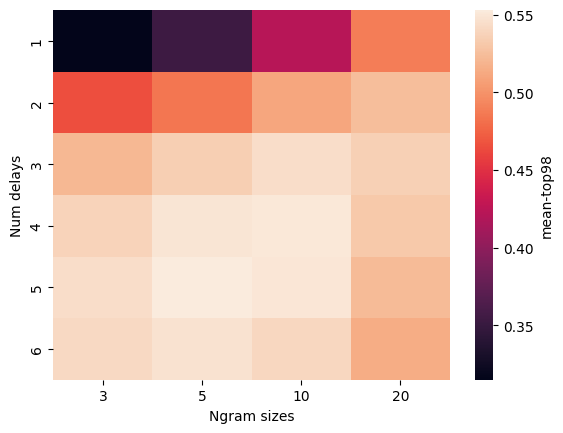

In [15]:
sns.heatmap(vals, xticklabels=ngram_sizes, yticklabels=ndels, cbar_kws={'label': met})
plt.xlabel('Ngram sizes')
plt.ylabel('Num delays')
plt.show()

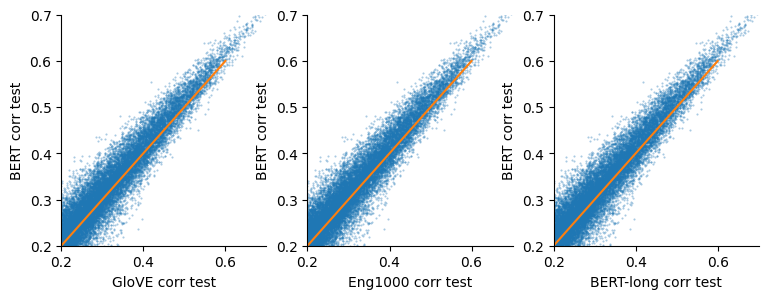

In [29]:
R, C = 1, 3
glove = 'glove__ndel=4'
bert = 'bert-10__ndel=4'
bert_long = 'bert-20__ndel=4'
eng1000 = 'eng1000__ndel=4'

def set_axes():
    plt.plot([-.4, .6], [-.4, .6])
    plt.xlim([0.2, .7])
    plt.ylim([0.2, 0.7])
    plt.ylabel('BERT corr test')


plt.figure(figsize=(C * 3, R * 3))
plt.subplot(R, C, 1)
plt.plot(corrs[bert_long], corrs[bert], '.', alpha=0.4, ms=1)
plt.xlabel('GloVE corr test')
set_axes()

plt.subplot(R, C, 2)
plt.plot(corrs[bert_long], corrs[bert], '.', alpha=0.4, ms=1)
plt.xlabel('Eng1000 corr test')
set_axes()

plt.subplot(R, C, 3)
plt.plot(corrs[bert_long], corrs[bert], '.', alpha=0.4, ms=1)
plt.xlabel('BERT-long corr test')
set_axes()

plt.show()

(array([4.0000e+00, 1.0400e+02, 1.6720e+03, 1.5254e+04, 2.7538e+04,
        2.9461e+04, 1.2580e+04, 6.4870e+03, 2.2710e+03, 1.8500e+02]),
 array([-0.67920846, -0.53499063, -0.3907728 , -0.24655497, -0.10233715,
         0.04188068,  0.18609851,  0.33031633,  0.47453416,  0.61875199,
         0.76296981]),
 <BarContainer object of 10 artists>)

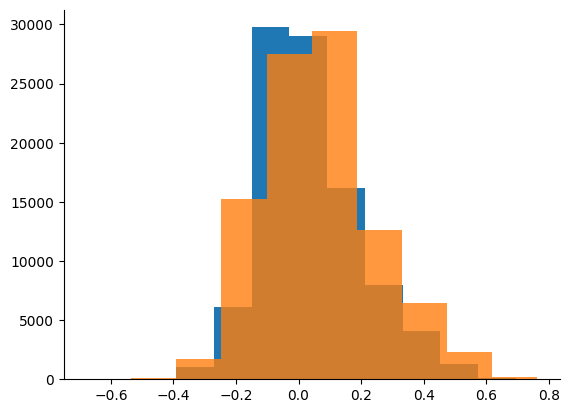

In [31]:
plt.hist(corrs[glove])
plt.hist(corrs[bert], alpha=0.8)

In [ ]:
# compare two subjects
corrs_glove_01 = np.load(join(results_dir, 'glove', 'UTS01', 'corrs.npz'))['arr_0']
print('01', np.mean(corrs_glove_01), '03', np.mean(corrs_glove))